In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Lecture de la base de données

# Construire le chemin d'accès au dataset
script_dir = os.path.abspath('')
relative_path = 'dataset/regularite-mensuelle-tgv-aqst.csv'
csv_path = os.path.join(script_dir, relative_path)

# Chargez le fichier CSV
data = pd.read_csv(csv_path, delimiter=";")
print(data.head())

      date   service         gare_depart         gare_arrivee  duree_moyenne  \
0  2018-01  National    BORDEAUX ST JEAN   PARIS MONTPARNASSE            141   
1  2018-01  National   LA ROCHELLE VILLE   PARIS MONTPARNASSE            165   
2  2018-01  National  PARIS MONTPARNASSE              QUIMPER            220   
3  2018-01  National  PARIS MONTPARNASSE              ST MALO            156   
4  2018-01  National  PARIS MONTPARNASSE  ST PIERRE DES CORPS             61   

   nb_train_prevu  nb_annulation  commentaire_annulation  \
0             870              5                     NaN   
1             222              0                     NaN   
2             248              1                     NaN   
3             102              0                     NaN   
4             391              2                     NaN   

   nb_train_depart_retard  retard_moyen_depart  ...  nb_train_retard_sup_15  \
0                     289            11.247809  ...                     110   


<h3><strong>Modèles de clustering :</strong></h3><p>

<h4><strong>K-Means :</strong></h4><p>

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes numériques pertinentes
features_numeric = [
    "retard_moyen_depart", "retard_moyen_arrivee", 
    "retard_moyen_tous_trains_depart", "retard_moyen_tous_trains_arrivee", 
    "retard_moyen_trains_retard_sup15", "nb_train_retard_sup_15",
    "nb_train_retard_sup_30", "nb_train_retard_sup_60"
]

# Convertir les colonnes catégorielles en variables indicatrices
data_dummies = pd.get_dummies(data[['gare_depart', 'gare_arrivee', 'service']], drop_first=True)

# Combiner les variables indicatrices avec les caractéristiques numériques
X_combined = pd.concat([data[features_numeric], data_dummies], axis=1)

# Normaliser les données combinées
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

print(X_combined_scaled[:5])  # Afficher les premières lignes des données normalisées combinées


[[ 3.37156153e-03 -3.51187212e-01  1.13476264e-01  1.05693628e-01
  -1.27175551e+00  3.99849031e+00  2.88282136e+00  7.66030237e-01
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
   7.51149354e+00 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -1.57755754e-01
  -2.25929377e-01 -9.03340323e-02 -7.44942251e-02 -1.28276067e-01
  -2.19253231e-01 -9.03340323e-02 -1.28276067e-01 -9.03340323e-02
  -9.03340323e-02 -1.34080305e-01 -9.03340323e-02 -9.03340323e-02
  -2.25929377e-01 -5.03485163e-01 -3.85712720e-01 -1.82920956e-01
  -6.65927158e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -1.34080305e-01 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -1.28276067e-01 -9.03340323e-02 -9.03340323e-02
  -9.03340

<h5><strong>Méthode de coude :</strong></h5><p>

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

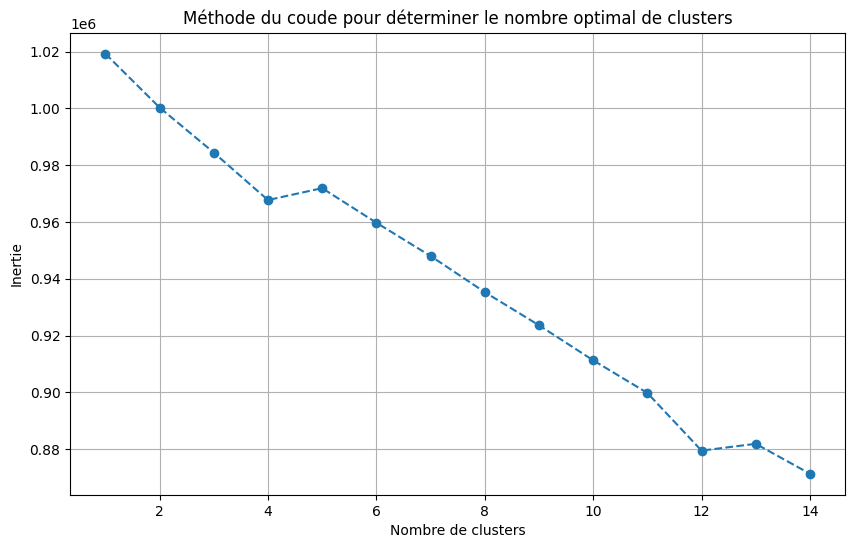

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculer les inerties pour différentes valeurs de k (nombre de clusters)
inertia = []
range_clusters = range(1, 15)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_combined_scaled)  # Utilisez X_combined_scaled au lieu de X_scaled
    inertia.append(kmeans.inertia_)

# Tracer la courbe de l'inertie
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid(True)
plt.show()


La méthode du coude consiste à représenter la variance expliquée en fonction du nombre de clusters, et à choisir le "coude" de la courbe comme indication du nombre optimal de clusters. Ce "coude" est le point où l'ajout de clusters supplémentaires n'apporte pas beaucoup plus d'information (c'est-à-dire que la variance expliquée ne diminue plus aussi rapidement).

D'après la courbe ci-dessus, il semble que le point du coude se situe autour de 3 ou 4 clusters. Cela suggère que 3 ou 4 serait un bon choix pour le nombre de clusters à utiliser dans le clustering K-means pour ces données.

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# 4. Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_combined_scaled)

# 5. Analyse des clusters
data["cluster"] = clusters
cause_summary = data.groupby("cluster")[["prct_cause_externe", "prct_cause_infra", "prct_cause_gestion_trafic", 
                                          "prct_cause_materiel_roulant", "prct_cause_gestion_gare", 
                                          "prct_cause_prise_en_charge_voyageurs"]].mean()
print(cause_summary)


         prct_cause_externe  prct_cause_infra  prct_cause_gestion_trafic  \
cluster                                                                    
0                 18.478770         15.690652                  19.029795   
1                 22.006480         22.621753                  19.289155   
2                 26.494753         21.378040                  18.585562   

         prct_cause_materiel_roulant  prct_cause_gestion_gare  \
cluster                                                         
0                          24.914891                10.299670   
1                          19.041665                 6.228597   
2                          18.001741                 7.132102   

         prct_cause_prise_en_charge_voyageurs  
cluster                                        
0                                    6.788242  
1                                    6.817779  
2                                    7.792654  


C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<strong>Analyse des clusters:</strong>

Nous avons trois clusters (0, 1, et 2).

Causes de Retard:

Les causes des retards sont réparties en six catégories: externe, infrastructure, gestion du trafic, matériel roulant, gestion en gare, et prise en charge des voyageurs.

Interprétation des Clusters:

- Cluster 0:
Le retard dû au matériel roulant est le plus élevé (~24.91%).
Les retards dus aux causes externes (~18.48%) et à la gestion du trafic (~19.03%) sont également notables.
Les retards dus à la prise en charge des voyageurs sont les plus faibles (~6.79%).
- Cluster 1:
Les retards dus aux causes externes (~22.01%) et à l'infrastructure (~22.62%) sont les plus élevés.
Les retards dus à la gestion en gare sont les plus faibles (~6.23%).
- Cluster 2:
Les retards dus aux causes externes (~26.49%) sont les plus élevés.
Les retards dus à la gestion en gare (~7.13%) et à la prise en charge des voyageurs (~7.79%) sont relativement faibles, mais légèrement plus élevés que dans les autres clusters.
Conclusion:

- Les trajets du Cluster 0 semblent être principalement affectés par des problèmes de matériel roulant.
- Les trajets du Cluster 1 ont des retards principalement dus à des causes externes et à des problèmes d'infrastructure.
- Les trajets du Cluster 2 sont fortement affectés par des causes externes, mais ils présentent également des retards notables dus à l'infrastructure et à la gestion du trafic.

En connaissant ces profils, nous pouvons cibler des interventions ou des améliorations spécifiques pour chaque groupe de trajets, en fonction des causes dominantes de retard.

vérifions d'abord combien d'éléments se trouvent dans chaque cluster.

In [6]:
# Count the number of elements in each cluster
cluster_counts = data["cluster"].value_counts()

cluster_counts


cluster
1    5157
2    2601
0     396
Name: count, dtype: int64

<h5><strong>Evaluation :</strong></h5><p>

Pour évaluer le modèle de clustering, nous pouvons utiliser plusieurs méthodes. L'une des méthodes couramment utilisées est le coefficient de silhouette, qui mesure la qualité des clusters. Une valeur proche de 1 suggère que les clusters sont bien séparés les uns des autres, tandis qu'une valeur proche de -1 suggère que les clusters se chevauchent.

In [7]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the clustering
silhouette_coefficient = silhouette_score(X_combined_scaled, clusters)

silhouette_coefficient


C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.013519183629009807

<h4><strong>Agglomerative Clustering : </strong></h4><p>

<h5><strong>Le dendogram :</strong></h5><p>

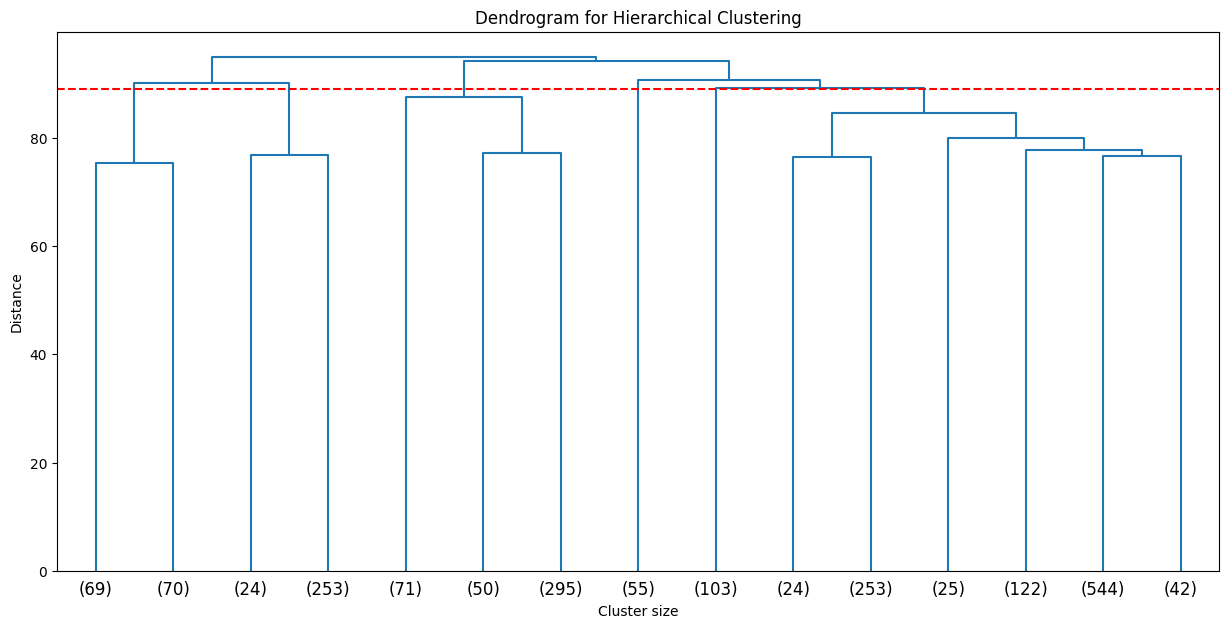

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import resample

sample_size = 2000  # Define the size of the subset
X_sample, clusters_sample = resample(X_combined_scaled, clusters, n_samples=sample_size, random_state=42, stratify=clusters)
# Perform hierarchical clustering
Z = linkage(X_sample, method='ward')  # Ward method minimizes variance of the distances between clusters

# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z, truncate_mode='lastp', p=15)  # Show only the last 20 merged clusters
cutting_height = 89  # Définissez la hauteur souhaitée ici
plt.axhline(y=cutting_height, color='r', linestyle='--')
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()


Dans l'idéal, les groupes doivent avoir un niveau de similarité relativement élevé et un niveau de distance relativement faible. Cependant, nous devons trouver un équilibre entre cet objectif et le fait de disposer d'un nombre de groupes raisonnable et pratique.

Dans notre cas, on remarque que le niveau de similarité est très grand au plus bas mais avec 15 clusters, ce n'est pas pratique puisque nos causes sont d'un nombre de 6, ensuite la similarité est réduite jusqu'à 11% environ pour 4 clusters environ, et on retrouve le nombre de clusters obtenus par K-Means au niveau de 8% environ. 

In [23]:
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters_agg = agg_clustering.fit_predict(X_sample)


C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


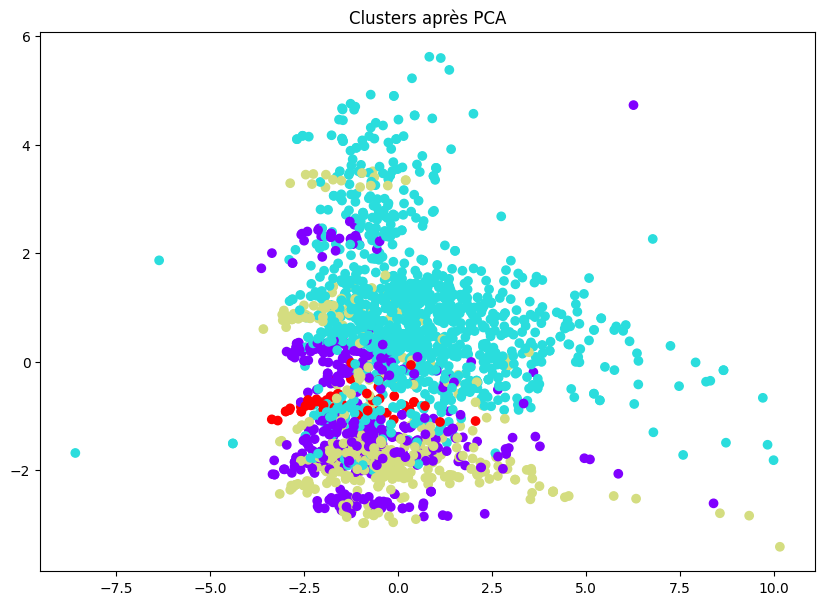

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Utilisation de PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Visualisation
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_agg, cmap='rainbow')
plt.title('Clusters après PCA')
plt.show()


- Plusieurs clusters distincts : 

Il est clairement visible que les données contiennent plusieurs groupes ou clusters distincts. Chaque couleur représente probablement un cluster différent.

- Distribution des clusters :

Il y a un grand groupe de points bleus qui s'étend principalement de la partie centrale gauche du graphique vers la droite supérieure.
Plusieurs petits clusters, comme ceux en rouge, violet et jaune, semblent être imbriqués ou superposés au milieu de la distribution principale des points bleus.
Certains clusters, comme le violet foncé en haut à droite, semblent être bien isolés et distincts des autres groupes.
Variabilité des tailles de clusters : Certains clusters (comme le bleu) sont beaucoup plus grands en termes de nombre de points, tandis que d'autres (comme le violet foncé) sont plus petits.

- Densité des points : 

La densité des points varie également. Certains clusters sont denses (comme le bleu au milieu), tandis que d'autres ont des points plus dispersés.

In [11]:
# Obtenir le nombre unique d'étiquettes (clusters)
n_clusters_generated = len(set(clusters_agg))

# Afficher le nombre de clusters
print(f"Nombre de clusters générés: {n_clusters_generated}")


Nombre de clusters générés: 14


<h5><strong>Evaluation :</strong></h5><p>

In [18]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_coeff_agg = silhouette_score(X_sample, clusters_agg)
silhouette_coeff_agg

0.09845692350751695

<h3><strong>Conclusion :</strong></h3><p>

On conclut que la prédiction des causes de retard est assez difficile à faire, le dataset de l'énoncé et les données récupérées ne permettent toujours pas de faire une bonne prédiction puisque le score est toujours proche de 0 et donc chevauchement entre les données. 